# Imbalance Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
credit=pd.read_csv('creditcard.csv')
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
credit.isnull().count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [14]:
credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [20]:
X=credit.drop('Class',axis=1)
Y=credit.Class

In [21]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [22]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

# Outliers & Its Impacts

In [24]:
titanic=pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
titanic['Age'].isnull().sum()

177

In [31]:
titanic.shape


(891, 12)

In [40]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Age', ylabel='Density'>

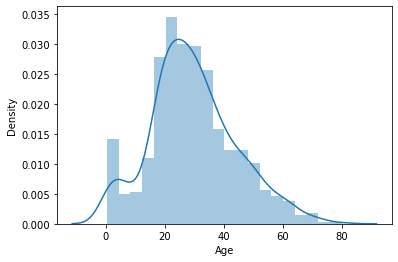

In [41]:
sns.distplot(titanic['Age'].dropna())

<AxesSubplot:xlabel='Age', ylabel='Density'>

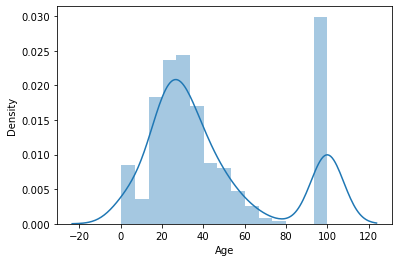

In [43]:
sns.distplot(titanic['Age'].fillna(100))

Text(0, 0.5, 'No.of Passengers')

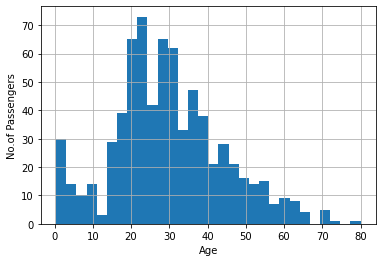

In [47]:
#using hist plot to see the data is normally distibuted / not


#Gaussian Distribution

fig=titanic.Age.hist(bins=30)
fig.set_xlabel('Age')
fig.set_ylabel('No.of Passengers')


<AxesSubplot:>

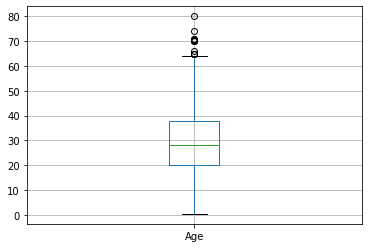

In [51]:
titanic.boxplot(column="Age")

In [53]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [57]:
#Assuming Age column in the Titanic dataset follows the Gaussian Distribution
# so we need to remove the 3rd point of std.dev from the mean value

mean=titanic['Age'].mean()
upperboundary=titanic['Age'].mean() + 3 * titanic['Age'].std()
lowerboundary=titanic['Age'].mean() - 3 * titanic['Age'].std()

print(mean),print(upperboundary),print(lowerboundary)

29.69911764705882
73.27860964406095
-13.88037434994331


(None, None, None)

In [59]:
#Lets compute using Interquantile range to calculate boundaries

IQR = titanic.Age.quantile(0.75)- titanic.Age.quantile(0.25)
IQR

17.875

In [62]:
#calculating the lower bridge & Higher bridge values from IGR ,, how the data goes with the boundaries


Lowerbridge= titanic.Age.quantile(0.25)-(IQR*1.5)
Higerbridge= titanic.Age.quantile(0.75)+(IQR*1.5)

print(Higerbridge),print(Lowerbridge)   ###here we have negative values , so age will not have negative values ...we dont want to worry about it

64.8125
-6.6875


(None, None)

In [63]:
#if we want to see Extreme outlier boundaries



Lowerbridge= titanic.Age.quantile(0.25)-(IQR*3)
Higerbridge= titanic.Age.quantile(0.75)+(IQR*3)

print(Higerbridge),print(Lowerbridge)

#here also we dont want to worry about thenegative values.
#age 91 is out outlier boundary  


91.625
-33.5


(None, None)

Text(0, 0.5, 'No.of Passengers')

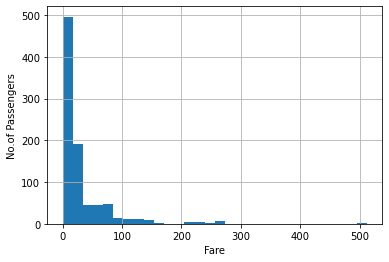

In [64]:

fig=titanic.Fare.hist(bins=30)
fig.set_xlabel('Fare')
fig.set_ylabel('No.of Passengers')


In [65]:
titanic.Fare.describe()   #if the data is Right skewed , the mean is > Median value

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [66]:
titanic['Fare'].median()

14.4542

<AxesSubplot:>

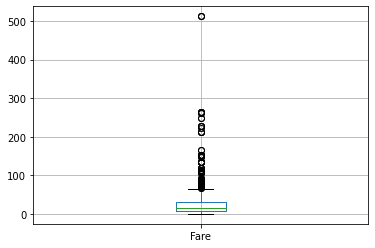

In [67]:
titanic.boxplot(column="Fare")

In [68]:
#Lets compute using Interquantile range to calculate boundaries

IQR = titanic.Fare.quantile(0.75)- titanic.Fare.quantile(0.25)
IQR

23.0896

In [69]:
#if we want to see Extreme outlier boundaries



Lowerbridge= titanic.Fare.quantile(0.25)-(IQR*3)
Higerbridge= titanic.Fare.quantile(0.75)+(IQR*3)

print(Higerbridge),print(Lowerbridge)

#here also we dont want to worry about thenegative values.



100.2688
-61.358399999999996


(None, None)

In [72]:
# so now we need to remove the Outlier data , that we found out with the Std technique ....(feature engi..)


data=titanic.copy()
data.loc[data['Age']>=73,'Age']=73


In [75]:
data.loc[data['Age']>=73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,73.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,73.0,0,0,347060,7.775,NaN,S


Text(0, 0.5, 'No.of Passengers')

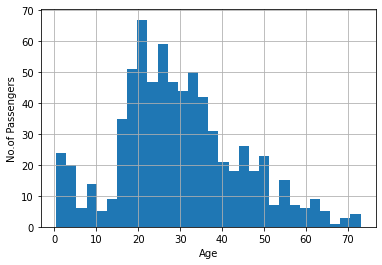

In [76]:

fig=data.Age.hist(bins=30)
fig.set_xlabel('Age')
fig.set_ylabel('No.of Passengers')

Text(0, 0.5, 'No.of Passengers')

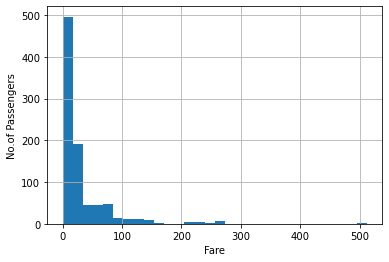

In [77]:

fig=titanic.Fare.hist(bins=30)
fig.set_xlabel('Fare')
fig.set_ylabel('No.of Passengers')

In [82]:
#so now im removing the Outliers in Fare column

data.loc[data['Fare']>=100,'Fare']=100




Text(0, 0.5, 'No.of Passengers')

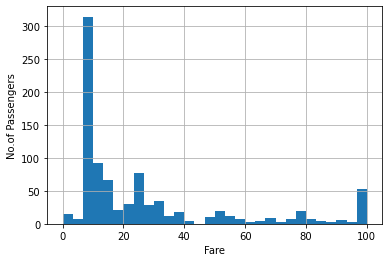

In [83]:
fig=data.Fare.hist(bins=30)
fig.set_xlabel('Fare')
fig.set_ylabel('No.of Passengers')